In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, LSTM, Activation, Flatten
from tensorflow.keras.models import Sequential
from math import sqrt
import math

In [2]:
X_train = np.load('SPAIN_data/X_train.npy')
X_val   = np.load('SPAIN_data/X_val.npy')
X_test  = np.load('SPAIN_data/X_test.npy')
Y_train = np.load('SPAIN_data/Y_train.npy')
Y_val  = np.load('SPAIN_data/Y_val.npy')
Y_test  = np.load('SPAIN_data/Y_test.npy')

In [3]:
#create evaluation function to use them in lstms training
#create MAPE and MAE functions
def mean_absolute_percentage_error(y_true, y_pred): 
    mape=np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mape
def mean_absolute_error(y_true, y_pred): 
    MAE = np.mean(np.abs(y_true-y_pred))
    return MAE
#create a function to evaluate LSTM with MAPE, MAE, RMSE, RRMSE and r2_score
def evaluation_function(y_true, y_pred):

    MAPE=mean_absolute_percentage_error(y_true, y_pred)
    print(f'MAPE: {"{:.5f}".format(MAPE)} %')
    MAE = mean_absolute_error(y_true, y_pred)
    print(f'MAE : {"{:.5f}".format(MAE)}')

    #RMSE and RRMSE
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f'RMSE: {"{:.5f}".format(rmse)}')

    RRMSE = (rmse/np.mean(y_true))*100
    print(f'RRMSE: {"{:.5f}".format(RRMSE)} % ')      
    r2 = r2_score(y_true, y_pred)
    print(f'Test R^2 score: {"{:.5f}".format(r2)}')
    
    return MAPE, MAE, rmse, RRMSE, r2
          
def yearly_error(y_true, y_pred):
    mape = []
    for i in range(0, len(y_pred)):
        for j in range(0, len(y_pred[0])):
            mape.append(mean_absolute_percentage_error(y_true[i][j],y_pred[i][j]))
    #count how many hours has error <=10%, >10% and <15%, >15% and find the percentage of every month
    count1 = 0
    count2 = 0
    count3 = 0
    for item in mape:
        if item <= 10:
            count1 += 1
        elif item <= 15:
            count2 += 1
        else :
            count3 += 1
    print('for the year')
    percentage1 =(count1*100) /(len(y_pred)*len(y_pred[0]))
    print(f'{"{:.3f}".format(percentage1)}% has error <=10')
    percentage2 =(count2*100) /(len(y_pred)*len(y_pred[0]))
    print(f'{"{:.3f}".format(percentage2)}% has error <=15')
    percentage3 =(count3*100) /(len(y_pred)*len(y_pred[0]))
    print(f'{"{:.3f}".format(percentage3)}% has error >15')
          
    return percentage1,percentage2,percentage3

### Load old model  make evaluation for each cluster

In [4]:
np.random.seed(7)
tf.random.set_seed(7)

In [5]:
hyp_1model = keras.models.load_model('Spain_models/hyp_arch1.h5')

In [6]:
# make a prediction and evaluation
initial_model_pred = hyp_1model.predict(X_test)
evaluation_function(Y_test, initial_model_pred)
print("\n")
yearly_error(Y_test , initial_model_pred)
print("\n")


MAPE: 6.35741 %
MAE : 0.04577
RMSE: 0.06536
RRMSE: 9.22303 % 
Test R^2 score: 0.27210


for the year
81.244% has error <=10
9.247% has error <=15
9.509% has error >15




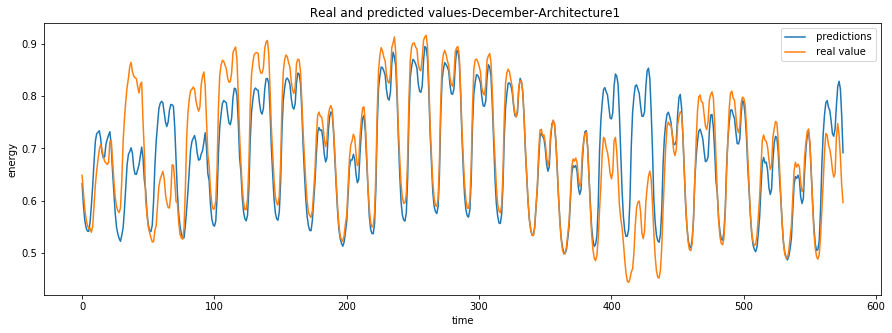

In [7]:
#plot predictions and actual values of load
#select the month 1>Jan, 2>feb, 3>Mar
Month =12
Ytest= np.array(Y_test)
predictions = initial_model_pred.flatten()
actual = Ytest.flatten()

fig = plt.figure(figsize=(15,5))
plt.plot(  predictions[31*24*(Month-1):31*24*Month] ,label = " predictions" )
plt.plot(  actual[31*24*(Month-1):31*24*Month], label = " real value ")
plt.xlabel('time')
plt.ylabel('energy')
plt.title(' Real and predicted values-December-Architecture1')
plt.legend()
plt.show()

In [8]:
#delete model 
#keras.backend.clear_session()


In [9]:
#create a function to calculate metrics by hour,
#and then use it to find metrics by cluster
def comparison_models( y_true , y_pred):
    metrics = []
    hours1 = []
    hours2 = []
    for i in range (0,24):
        temp1 = []
        temp2 = []
        for day1,day2 in zip(y_true , y_pred):
            temp1.append(day1[i])
            temp2.append(day2[i])
        hours1.append(temp1)
        hours2.append(temp2)
    count = 0
    for hour1,hour2 in zip(hours1,hours2):
        print("\n")
        print(count + 1, "Hour")
        count += 1
        
        MAPE, MAE, rmse, RRMSE, r2 = evaluation_function( np.array(hour1), np.array(hour2) ) 
        per1, per2 ,per3 = yearly_error( [hour1], [hour2] )
        temp = [ MAPE, MAE, rmse, RRMSE, r2, per1, per2 ,per3  ]
        metrics.append(temp)
    return metrics

In [10]:
metrics_by_hour_old = comparison_models(Y_test , initial_model_pred)



1 Hour
MAPE: 4.44478 %
MAE : 0.02814
RMSE: 0.03716
RRMSE: 5.96665 % 
Test R^2 score: 0.39655
for the year
92.055% has error <=10
6.849% has error <=15
1.096% has error >15


2 Hour
MAPE: 4.50482 %
MAE : 0.02698
RMSE: 0.03508
RRMSE: 5.95830 % 
Test R^2 score: 0.26902
for the year
92.055% has error <=10
6.575% has error <=15
1.370% has error >15


3 Hour
MAPE: 4.44396 %
MAE : 0.02564
RMSE: 0.03307
RRMSE: 5.80519 % 
Test R^2 score: 0.21824
for the year
92.055% has error <=10
6.575% has error <=15
1.370% has error >15


4 Hour
MAPE: 4.46830 %
MAE : 0.02531
RMSE: 0.03283
RRMSE: 5.85406 % 
Test R^2 score: 0.21173
for the year
92.329% has error <=10
5.753% has error <=15
1.918% has error >15


5 Hour
MAPE: 4.61500 %
MAE : 0.02617
RMSE: 0.03411
RRMSE: 6.06349 % 
Test R^2 score: 0.21519
for the year
91.781% has error <=10
5.479% has error <=15
2.740% has error >15


6 Hour
MAPE: 5.47156 %
MAE : 0.03243
RMSE: 0.04335
RRMSE: 7.36828 % 
Test R^2 score: 0.28380
for the year
85.753% has error <=10

In [11]:
#define a function to find metrics of a cluster
def cluster_evaluation(metrics_by_hour, hours):
    metrics = {"mape":0 ,"mae":0 ,"rmse":0 ,"rrmse":0 ,"r2":0,
               "<=10":0, "<=15":0, ">=15":0 }
    metrics_id = {"mape":0 ,"mae":1 ,"rmse":2 ,"rrmse":3 ,"r2":4, 
                  "<=10":5, "<=15":6, ">=15":7  }
    for hour in hours:
        for metr_id in metrics_id:
            metrics[metr_id] += metrics_by_hour[hour][metrics_id[metr_id]]
    for item in metrics:
        metrics[item] /=len(hours)
        print(item, ":", metrics[item])

In [12]:
#residual
#Cluster1 
hours = [12, 13, 14, 15, 16, 17, 18, 21] 
print('Cluster1')
cluster_evaluation(metrics_by_hour_old, hours)
#Cluster2 
hours = [0, 1, 2, 3, 4, 5, 6, 22, 23]
print('Cluster2 ')
cluster_evaluation(metrics_by_hour_old, hours)
#Cluster3
hours = [7, 8, 9, 10, 11, 19, 20]
print('Cluster3 ')
cluster_evaluation(metrics_by_hour_old, hours)

Cluster1
mape : 7.04866162595117
mae : 0.05418667271662239
rmse : 0.07404276857942223
rrmse : 9.662989145906417
r2 : 0.23294985518446756
<=10 : 76.26712328767123
<=15 : 10.684931506849315
>=15 : 13.047945205479452
Cluster2 
mape : 4.983164472972799
mae : 0.031011483513004163
rmse : 0.04132764242268273
rrmse : 6.711360971763855
r2 : 0.30284577384607014
<=10 : 88.85844748858449
<=15 : 7.488584474885845
>=15 : 3.65296803652968
Cluster3 
mape : 7.334298964952922
mae : 0.055138704186702345
rmse : 0.07720320839797287
rrmse : 10.130783646291045
r2 : 0.2773170967577371
<=10 : 77.14285714285714
<=15 : 9.863013698630137
>=15 : 12.994129158512722


###  Evaluate the  3 different models for each cluster

In [13]:
#save predictions in a list
total_predictions_se= []
total_metrics = []

#### model 1

In [14]:
#load data
X_train1 = np.load('X_train_Spint1.npy')
X_val1   = np.load('X_val_Spint1.npy')
X_test1  = np.load('X_test_Spint1.npy')
Y_train1 = np.load('Y_train_Spint1.npy')
Y_val1   = np.load('Y_val_Spint1.npy')
Y_test1  = np.load('Y_test_Spint1.npy')

In [15]:
"""
#load data
X_train1 = np.load('X_train_Spres1.npy')
X_val1   = np.load('X_val_Spres1.npy')
X_test1  = np.load('X_test_Spres1.npy')
Y_train1 = np.load('Y_train_Spres1.npy')
Y_val1   = np.load('Y_val_Spres1.npy')
Y_test1  = np.load('Y_test_Spres1.npy')
"""

"\n#load data\nX_train1 = np.load('X_train_Spres1.npy')\nX_val1   = np.load('X_val_Spres1.npy')\nX_test1  = np.load('X_test_Spres1.npy')\nY_train1 = np.load('Y_train_Spres1.npy')\nY_val1   = np.load('Y_val_Spres1.npy')\nY_test1  = np.load('Y_test_Spres1.npy')\n"

In [17]:
#residual
#model_1 = keras.models.load_model('Spain_models/hyp_cluster1_spain_res.h5')
#intergrate
model_1 = keras.models.load_model('hyp_cluster1_spain_int.h5')

In [18]:
# make a prediction and evaluation
Y_pred_1 = model_1.predict(X_test1)

MAPE, MAE, rmse, RRMSE, r2 =  evaluation_function(y_true= Y_test1, y_pred= Y_pred_1)
print("\n")
per1,per2,per3 = yearly_error(y_true =Y_test1 , y_pred = Y_pred_1)
print("\n")
total_metrics.append([MAPE, MAE, rmse, RRMSE, r2, per1,per2,per3])

MAPE: 6.91552 %
MAE : 0.05045
RMSE: 0.07318
RRMSE: 9.94924 % 
Test R^2 score: 0.30978


for the year
77.025% has error <=10
10.646% has error <=15
12.329% has error >15




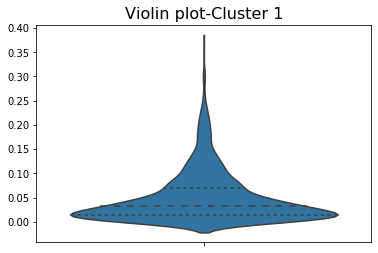

In [19]:
def violin_plot_error(error):
    ax = sns.violinplot(y=abs(error), inner='quartile')
    ax.set_title('Violin plot-Cluster 1', fontsize=16);
#violin plot for absolute error
violin_plot_error(Y_test1- Y_pred_1)

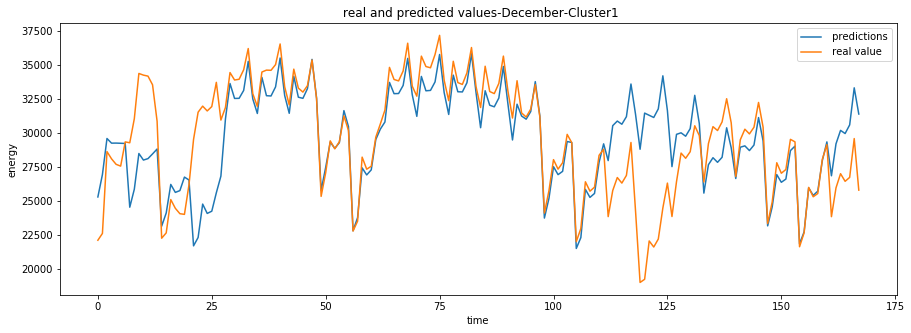

In [20]:
#plot predictions and actual values of load , for January
#select the month 1>Jan, 2>feb, 3>Mar
Month = 12
hours = len(Y_test1[0])
Ytest= np.array(Y_test1)
predictions = Y_pred_1.flatten()
actual = Ytest.flatten()
ac = actual*41015
pr = predictions*41015
fig = plt.figure(figsize=(15,5))
plt.plot(  pr[31*hours*(Month-1):31*hours*Month] ,label = " predictions" )
plt.plot(  ac[31*hours*(Month-1):31*hours*Month] , label = " real value ")
plt.xlabel('time')
plt.ylabel('energy')
plt.title(' real and predicted values-December-Cluster1')
plt.legend()
plt.show()

In [21]:
total_predictions_se.append(Y_pred_1)

#### model 2

In [22]:
#load data
 
X_train2 = np.load('X_train_Spint2.npy')
X_val2   = np.load('X_val_Spint2.npy')
X_test2  = np.load('X_test_Spint2.npy')
Y_train2 = np.load('Y_train_Spint2.npy')
Y_val2   = np.load('Y_val_Spint2.npy')
Y_test2  = np.load('Y_test_Spint2.npy')
"""
#load data
X_train2 = np.load('X_train_Spres2.npy')
X_val2   = np.load('X_val_Spres2.npy')
X_test2  = np.load('X_test_Spres2.npy')
Y_train2 = np.load('Y_train_Spres2.npy')
Y_val2   = np.load('Y_val_Spres2.npy')
Y_test2  = np.load('Y_test_Spres2.npy')
"""

"\n#load data\nX_train2 = np.load('X_train_Spres2.npy')\nX_val2   = np.load('X_val_Spres2.npy')\nX_test2  = np.load('X_test_Spres2.npy')\nY_train2 = np.load('Y_train_Spres2.npy')\nY_val2   = np.load('Y_val_Spres2.npy')\nY_test2  = np.load('Y_test_Spres2.npy')\n"

In [23]:
#residual clustering
#model_2 = keras.models.load_model('Spain_models/hyp_cluster2_spain_res.h5')
#intergrated clustering
model_2 = keras.models.load_model('hyp_cluster2_spain_int.h5')

In [24]:
# make a prediction and evaluation
Y_pred_2 = model_2.predict(X_test2)

MAPE, MAE, rmse, RRMSE, r2 = evaluation_function(y_true= Y_test2, y_pred= Y_pred_2)
print("\n")
per1,per2,per3 = yearly_error(y_true =Y_test2 , y_pred = Y_pred_2)
print("\n")
total_metrics.append([MAPE, MAE, rmse, RRMSE, r2, per1,per2,per3])


MAPE: 4.34610 %
MAE : 0.02634
RMSE: 0.03505
RRMSE: 5.82396 % 
Test R^2 score: 0.40772


for the year
91.815% has error <=10
5.959% has error <=15
2.226% has error >15




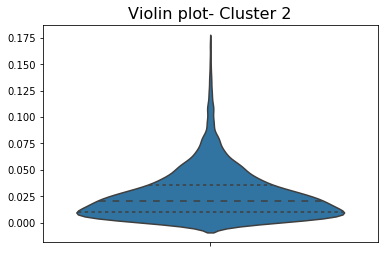

In [42]:
def violin_plot_error(error):
    ax = sns.violinplot(y=abs(error), inner='quartile')
    ax.set_title('Violin plot- Cluster 2', fontsize=16);
#violin plot for absolute error
violin_plot_error(Y_test2- Y_pred_2)

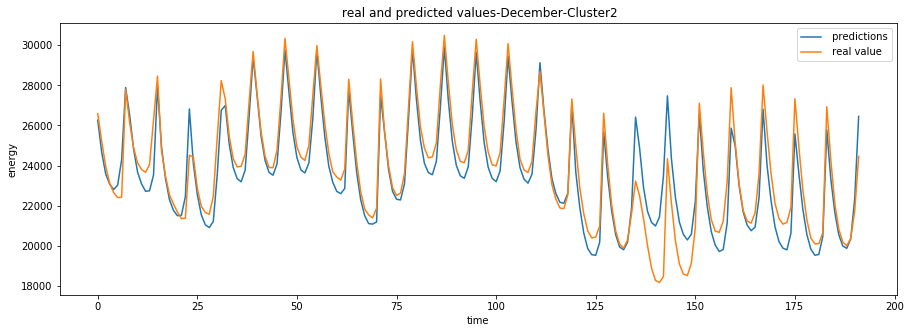

In [43]:
#plot predictions and actual values of load
#select the month 1>Jan, 2>feb, 3>Mar
Month = 12
hours = len(Y_test2[0])
Ytest_2= np.array(Y_test2)
predictions = Y_pred_2.flatten()
actual = Ytest_2.flatten()
ac = actual*41015
pr = predictions*41015
fig = plt.figure(figsize=(15,5))
plt.plot(  pr[31*hours*(Month-1):31*hours*Month],label = " predictions" )
plt.plot(  ac[31*hours*(Month-1):31*hours*Month], label = " real value ")
plt.xlabel('time')
plt.ylabel('energy')
plt.title(' real and predicted values-December-Cluster2')
plt.legend()
plt.show()

In [28]:
total_predictions_se.append(Y_pred_2)

#### LSTM for cluster3

In [29]:
#load data
 
X_train3 = np.load('X_train_Spint3.npy')
X_val3   = np.load('X_val_Spint3.npy')
X_test3  = np.load('X_test_Spint3.npy')
Y_train3 = np.load('Y_train_Spint3.npy')
Y_val3   = np.load('Y_val_Spint3.npy')
Y_test3  = np.load('Y_test_Spint3.npy')
"""
#load data
X_train3 = np.load('X_train_Spres3.npy')
X_val3   = np.load('X_val_Spres3.npy')
X_test3  = np.load('X_test_Spres3.npy')
Y_train3 = np.load('Y_train_Spres3.npy')
Y_val3   = np.load('Y_val_Spres3.npy')
Y_test3  = np.load('Y_test_Spres3.npy')
"""

"\n#load data\nX_train3 = np.load('X_train_Spres3.npy')\nX_val3   = np.load('X_val_Spres3.npy')\nX_test3  = np.load('X_test_Spres3.npy')\nY_train3 = np.load('Y_train_Spres3.npy')\nY_val3   = np.load('Y_val_Spres3.npy')\nY_test3  = np.load('Y_test_Spres3.npy')\n"

In [30]:
#residual clustering
#model_3 = keras.models.load_model('Spain_models/hyp_cluster3_spain_res.h5')
#intergrated clustering
model_3 = keras.models.load_model('hyp_cluster3_spain_int.h5')

In [31]:
# make a prediction and evaluation
Y_pred_3 = model_3.predict(X_test3)

MAPE, MAE, rmse, RRMSE, r2 =  evaluation_function(y_true= Y_test3, y_pred= Y_pred_3)
print("\n")
per1,per2,per3 = yearly_error(y_true =Y_test3 , y_pred = Y_pred_3)
print("\n")
total_metrics.append([MAPE, MAE, rmse, RRMSE, r2, per1,per2,per3])


MAPE: 6.53052 %
MAE : 0.05053
RMSE: 0.06858
RRMSE: 8.76153 % 
Test R^2 score: 0.37177


for the year
77.960% has error <=10
12.359% has error <=15
9.680% has error >15




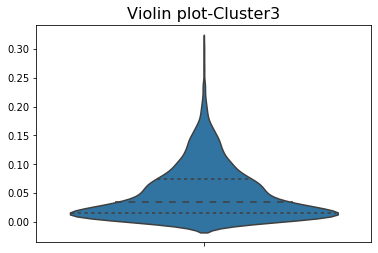

In [44]:
def violin_plot_error(error):
    ax = sns.violinplot(y=abs(error), inner='quartile')
    ax.set_title('Violin plot-Cluster3', fontsize=16);
#violin plot for absolute error
violin_plot_error(Y_test3- Y_pred_3)

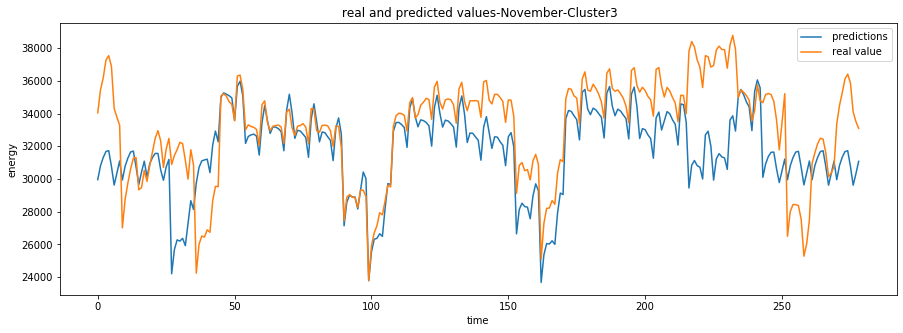

In [45]:
#plot predictions and actual values of load
#select the month 1>Jan, 2>feb, 3>Mar
Month = 11
hours = len(Y_test3[0])
Ytest_3= np.array(Y_test3)
predictions = Y_pred_3.flatten()
actual = Ytest_3.flatten()
ac = actual*41015
pr = predictions*41015
fig = plt.figure(figsize=(15,5))
plt.plot(  pr[31*hours*(Month-1):31*hours*Month],label = " predictions" )
plt.plot(  ac[31*hours*(Month-1):31*hours*Month], label = " real value ")
plt.xlabel('time')
plt.ylabel('energy')
plt.title(' real and predicted values-November-Cluster3')
plt.legend()
plt.show()

In [35]:
total_predictions_se.append(Y_pred_3)

#### find Cl-time lstm metrics

In [66]:
total_clusters = [[7, 8, 15, 16, 17, 18, 22], [0, 1, 2, 3, 4, 5, 6, 23], [9, 10, 11, 12, 13, 14, 19, 20, 21]]

In [67]:
#calculate total metrics
def final_metrics (metrics , clusters):
    final_met = []
    for i in range(0,len(metrics[0])):
        temp = 0
        for j in range(0,len(clusters)):
            temp = temp +  metrics[j][i] * len(clusters[j])
        temp = temp /24
        final_met.append(temp)
    return final_met

In [68]:
metrics_final = final_metrics (total_metrics , total_clusters)
met = ["MAPE" , "MAE", "rmse", "RRMSE", "r2", "<=10","<=15",">15"]
for m in range(0,len(met)):
    print(met[m],metrics_final[m])

MAPE 5.914671493062681
MAE 0.04244714630512126
rmse 0.058742542600088606
RRMSE 8.12875281012945
r2 0.3656716812576071
<=10 82.30593607305936
<=15 9.726027397260275
>15 7.968036529680366
